In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time



In [49]:
df=pd.read_csv('creditcard.csv')

In [50]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [52]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [53]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
print('No frauds : ',round(df['Class'].value_counts()[0]/len(df) * 100,2),'%')
print(' frauds : ',round(df['Class'].value_counts()[1]/len(df) * 100,2),'%')

No frauds :  99.83 %
 frauds :  0.17 %


<AxesSubplot:xlabel='Class', ylabel='count'>

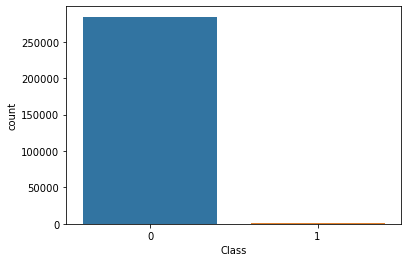

In [55]:
sns.countplot(df['Class'],order=df['Class'].value_counts().index)

In [56]:
df['Class'].skew()

23.99757931064749

In [57]:
df['Class'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

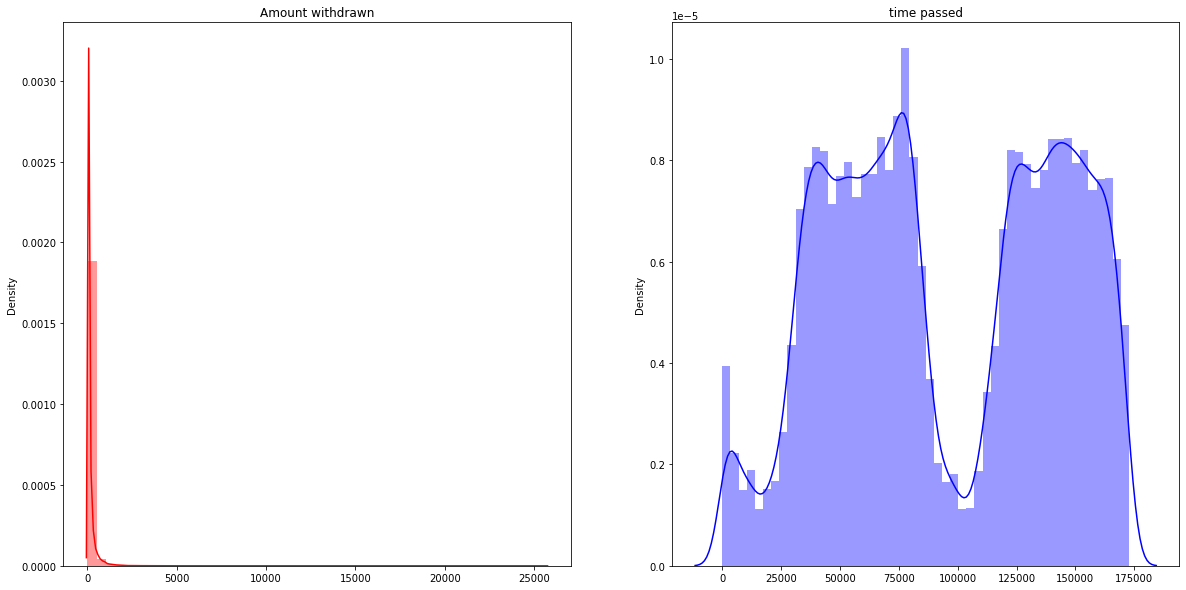

In [58]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
amount=df['Amount'].values
sns.distplot(amount,ax=ax[0],color='r')
ax[0].set_title("Amount withdrawn")

time=df['Time'].values
sns.distplot(time,ax=ax[1],color='b')
ax[1].set_title("time passed")
plt.show()

In [59]:
df['Time'].skew(),df['Amount'].skew()

(-0.0355676180063216, 16.977724453761024)

In [60]:
from sklearn.preprocessing import StandardScaler, RobustScaler        

In [61]:
std_scalar=StandardScaler()
rob_scalar=RobustScaler()

In [62]:
df['scaled_time']=rob_scalar.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount']=rob_scalar.fit_transform(df['Amount'].values.reshape(-1,1))

In [63]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_time,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.994983,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.994983,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.994972,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-0.994972,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.994960,0.670579


In [64]:
df['scaled_time'].min(),df['scaled_time'].max()

(-0.9949834936970594, 1.0350215580540185)

In [65]:
df['scaled_amount'].min(),df['scaled_amount'].max()

(-0.30741284147278697, 358.6831551736184)

In [66]:
df.drop(['Amount','Time'],axis=1,inplace=True)

In [67]:
df.loc[df['Class']==1].value_counts().sum()

492

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


In [69]:
x=df.drop('Class',axis=1)
y=df['Class']
sss=StratifiedKFold(n_splits=5,random_state=None, shuffle=False)
for train_index, test_index in sss.split(x,y):
    print('test:',test_index,'train: ',train_index)
    Original_Xtrain,Original_Xtest=x.iloc[train_index],x.iloc[test_index]
    Original_Ytrain,Original_Ytest=y.iloc[train_index],y.iloc[test_index]

test: [    0     1     2 ... 57017 57018 57019] train:  [ 30473  30496  31002 ... 284804 284805 284806]
test: [ 30473  30496  31002 ... 113964 113965 113966] train:  [     0      1      2 ... 284804 284805 284806]
test: [ 81609  82400  83053 ... 170946 170947 170948] train:  [     0      1      2 ... 284804 284805 284806]
test: [150654 150660 150661 ... 227866 227867 227868] train:  [     0      1      2 ... 284804 284805 284806]
test: [212516 212644 213092 ... 284804 284805 284806] train:  [     0      1      2 ... 227866 227867 227868]


In [70]:
Original_Xtrain = Original_Xtrain.values
Original_Xtest = Original_Xtest.values
Original_Ytrain = Original_Ytrain.values
Original_Ytest = Original_Ytest.values

In [71]:
train_unique_label, train_counts_label = np.unique(Original_Ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(Original_Ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(Original_Ytrain))
print(test_counts_label/ len(Original_Ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [72]:
df=df.sample(frac=1)
fraudcase=df.loc[df['Class']==1]
nofraudcase=df.loc[df['Class']==0][:492]

In [73]:
nddf=pd.concat([fraudcase,nofraudcase])
new_df=nddf.sample(frac=1,random_state=42)


In [74]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
35239,-0.598060,1.084426,0.688165,0.096915,1.068041,-0.853171,0.840001,-0.002602,-0.810830,-1.013077,...,0.255127,-0.250640,-0.114557,-0.048153,-0.549632,0.140264,0.172968,0,-0.548209,-0.293440
9509,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,...,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1,-0.828722,-0.293440
27862,1.294054,0.152664,0.195524,0.540694,-0.267245,-0.691144,0.001673,-0.175527,0.179203,-0.032250,...,0.213211,-0.163730,-0.064862,0.606466,0.504450,-0.033823,0.006327,0,-0.586884,-0.224272
153835,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,-20.949192,...,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1,0.183343,-0.293440
105178,1.140431,1.134243,-1.429455,2.012226,0.622800,-1.152923,0.221159,0.037372,0.034486,-1.879644,...,-0.891627,-0.160578,-0.108326,0.668374,-0.352393,0.071993,0.113684,1,-0.179725,-0.293440


<AxesSubplot:xlabel='Class', ylabel='count'>

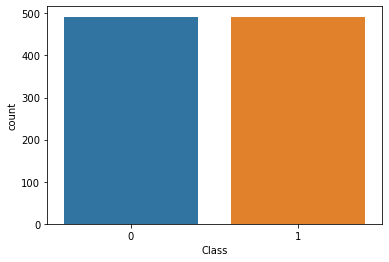

In [75]:
sns.countplot(new_df['Class'])

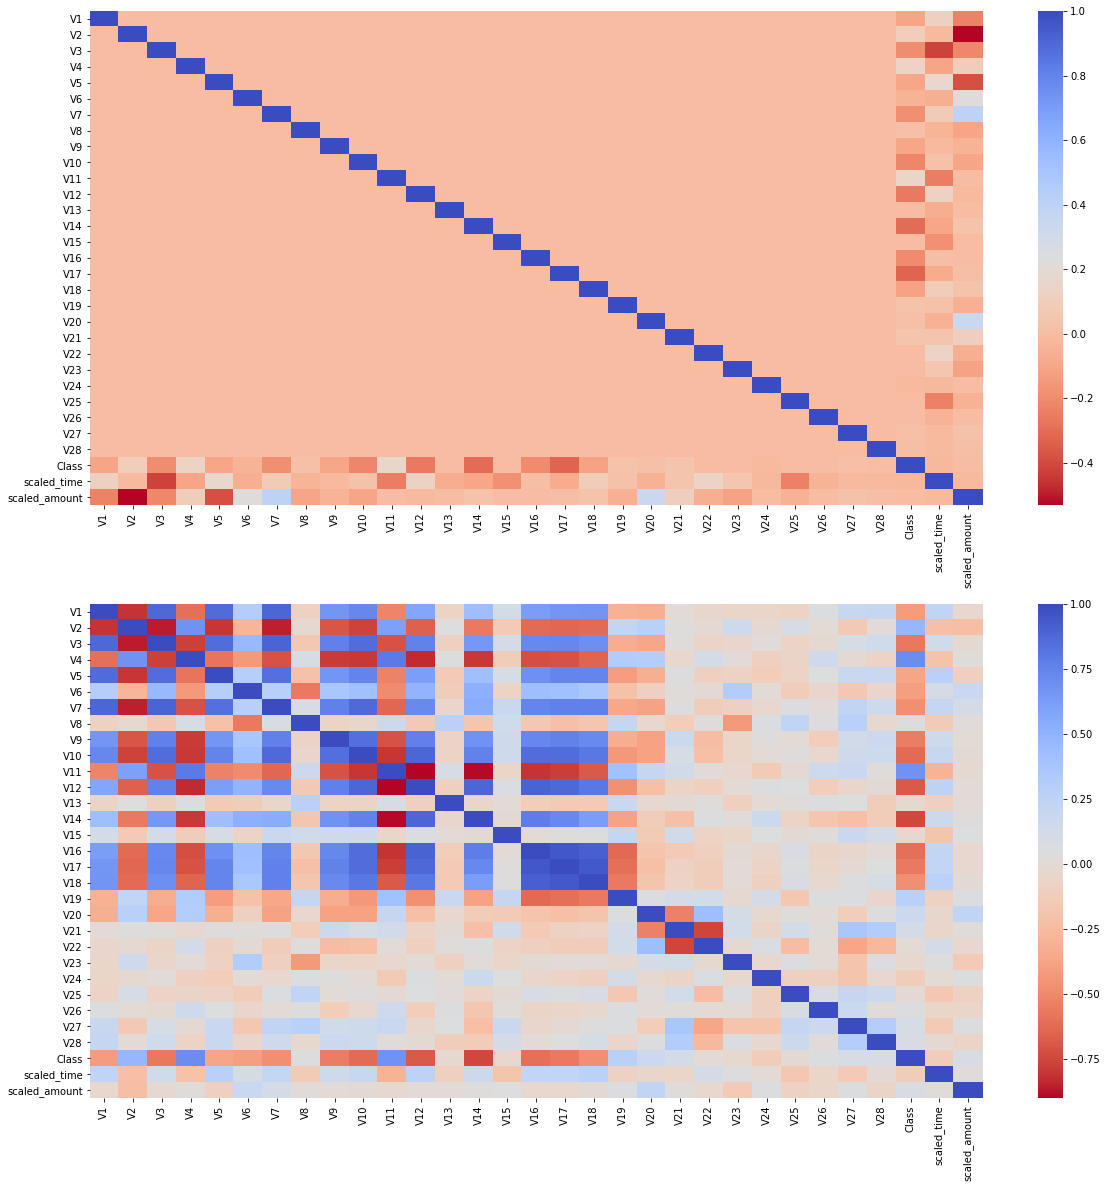

In [76]:

fig,ax=plt.subplots(2,1,figsize=(20,20))
sns.heatmap(df.corr(),ax=ax[0],cmap='coolwarm_r')
sns.heatmap(new_df.corr(),ax=ax[1],cmap='coolwarm_r')
plt.show()

<AxesSubplot:xlabel='Class', ylabel='V16'>

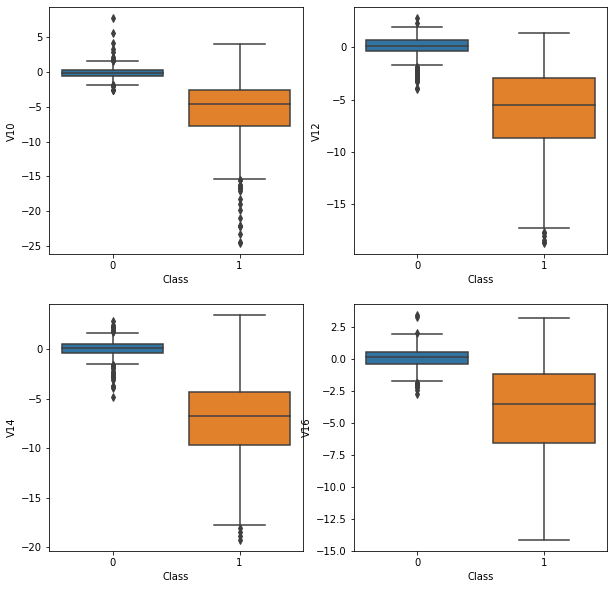

In [77]:
# highest negative corr()
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x=new_df['Class'],y=df['V10'],ax=ax[0,0])
sns.boxplot(x=new_df['Class'],y=df['V12'],ax=ax[0,1])
sns.boxplot(x=new_df['Class'],y=df['V14'],ax=ax[1,0])
sns.boxplot(x=new_df['Class'],y=df['V16'],ax=ax[1,1])

<AxesSubplot:xlabel='V16', ylabel='Density'>

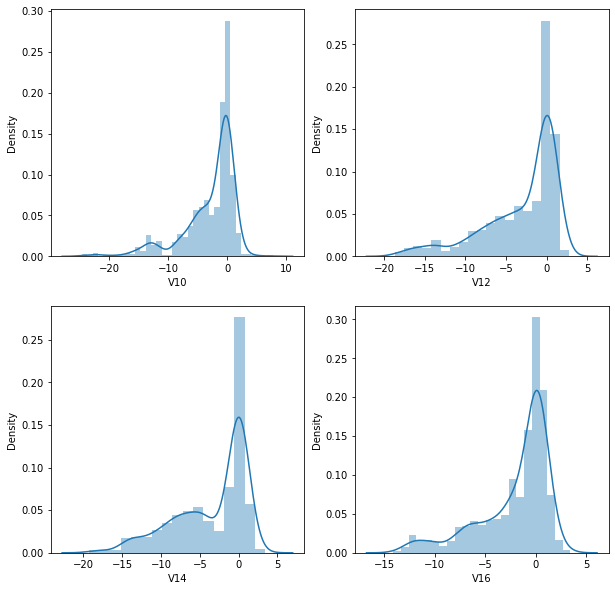

In [78]:
# highest negative corr()
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.distplot(new_df['V10'],ax=ax[0,0])
sns.distplot(new_df['V12'],ax=ax[0,1])
sns.distplot(new_df['V14'],ax=ax[1,0])
sns.distplot(new_df['V16'],ax=ax[1,1])

<AxesSubplot:xlabel='Class', ylabel='V19'>

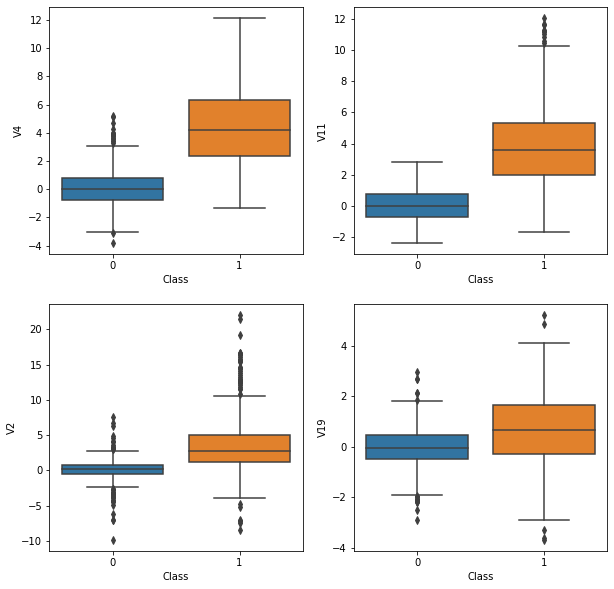

In [79]:
#highest positive corr()
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x=new_df['Class'],y=df['V4'],ax=ax[0,0])
sns.boxplot(x=new_df['Class'],y=df['V11'],ax=ax[0,1])
sns.boxplot(x=new_df['Class'],y=df['V2'],ax=ax[1,0])
sns.boxplot(x=new_df['Class'],y=df['V19'],ax=ax[1,1])


<AxesSubplot:xlabel='V19', ylabel='Density'>

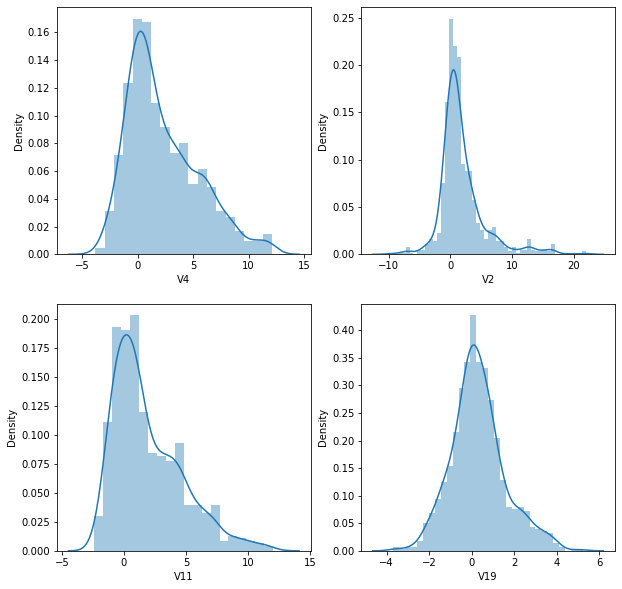

In [80]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.distplot(new_df['V4'],ax=ax[0,0])
sns.distplot(new_df['V2'],ax=ax[0,1])
sns.distplot(new_df['V11'],ax=ax[1,0])
sns.distplot(new_df['V19'],ax=ax[1,1])

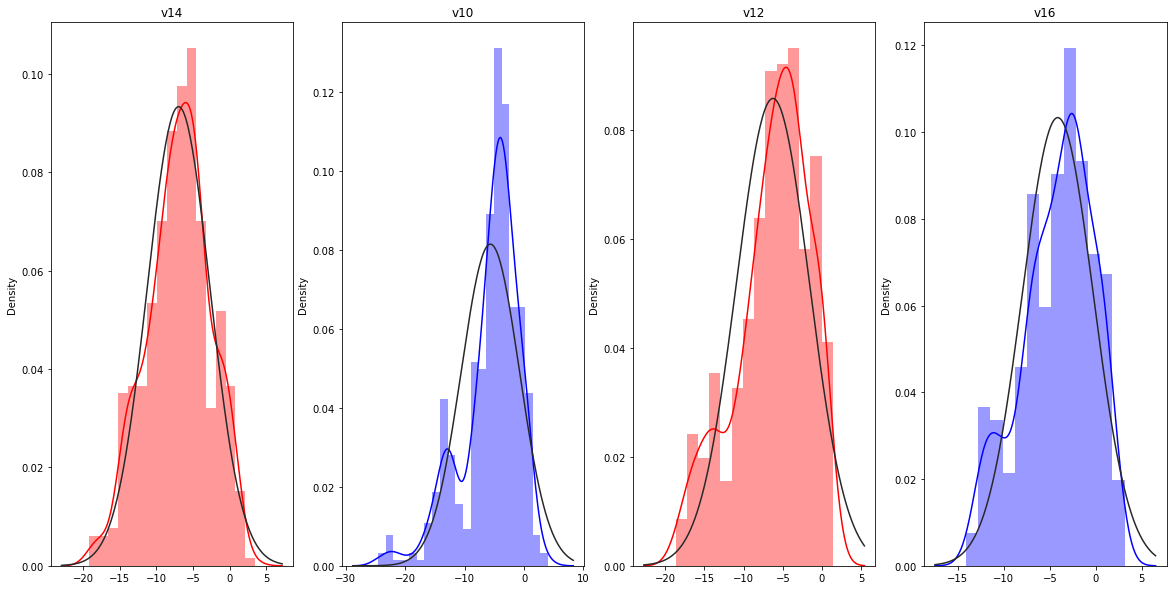

In [81]:
from scipy.stats import norm
f,ax=plt.subplots(1,4,figsize=(20,10))
v14fraudlist=new_df.loc[new_df['Class']==1,'V14'].values
v10fraudlist=new_df.loc[new_df['Class']==1,'V10'].values
v12fraudlist=new_df.loc[new_df['Class']==1,'V12'].values
v16fraudlist=new_df.loc[new_df['Class']==1,'V16'].values

sns.distplot(v14fraudlist,fit=norm,color='r',ax=ax[0])
sns.distplot(v10fraudlist,fit=norm,color='b',ax=ax[1])
sns.distplot(v12fraudlist,fit=norm,color='r',ax=ax[2])
sns.distplot(v16fraudlist,fit=norm,color='b',ax=ax[3])

ax[0].set_title('v14')
ax[1].set_title('v10')
ax[2].set_title('v12')
ax[3].set_title('v16')
plt.show()


In [82]:
new_df['V14'].skew()

-1.0042389109592487

In [83]:
new_df['V10'].skew()

-1.794844553755575

In [84]:
new_df['V12'].skew()

-1.3552129503610002

In [85]:
new_df['V16'].skew()


-1.389632471561076

In [86]:

v14q1,v14q2=np.percentile(v14fraudlist,25),np.percentile(v14fraudlist,75)
v14iqr=v14q2-v14q1

v14cut=1.5*v14iqr
v14min=v14q1-v14cut
v14max=v14q2+v14cut

v14outliers=[x for x in v14fraudlist if x < v14min or x > v14max]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(v14outliers)))
print('V14 outliers:{}'.format(v14outliers))

Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.4937733551053, -18.0499976898594, -18.8220867423816]


In [87]:

v10q1,v10q2=np.percentile(v10fraudlist,25),np.percentile(v10fraudlist,75)
v10iqr=v10q2-v10q1

v10cut=1.5*v10iqr
v10min=v10q1-v10cut
v10max=v10q2+v10cut

v10outliers=[x for x in v10fraudlist if x < v10min or x > v10max]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(v10outliers)))
print('V10 outliers:{}'.format(v10outliers))

Feature V10 Outliers for Fraud Cases: 19
V10 outliers:[-20.9491915543611, -24.4031849699728, -15.5637913387301, -16.2556117491401, -17.1415136412892, -16.7460441053944, -16.6011969664137, -22.1870885620007, -18.2711681738888, -23.2282548357516, -24.5882624372475, -22.1870885620007, -15.5637913387301, -16.3035376590131, -22.1870885620007, -18.9132433348732, -19.836148851696, -16.6496281595399, -22.1870885620007]


In [88]:

v12q1,v12q2=np.percentile(v12fraudlist,25),np.percentile(v12fraudlist,75)
v12iqr=v12q2-v12q1

v12cut=1.5*v12iqr
v12min=v12q1-v12cut
v12max=v12q2+v12cut

v12outliers=[x for x in v12fraudlist if x < v12min or x > v12max]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(v12outliers)))
print('V12 outliers:{}'.format(v12outliers))

Feature V12 Outliers for Fraud Cases: 6
V12 outliers:[-18.4311310279993, -17.7691434633638, -18.5536970096458, -17.6316063138707, -18.0475965708216, -18.6837146333443]


In [89]:

v16q1,v16q2=np.percentile(v16fraudlist,25),np.percentile(v16fraudlist,75)
v16iqr=v16q2-v16q1

v16cut=1.5*v16iqr
v16min=v16q1-v16cut
v16max=v16q2+v16cut

v16outliers=[x for x in v16fraudlist if x < v16min or x > v16max]
print('Feature V16 Outliers for Fraud Cases: {}'.format(len(v16outliers)))
print('V16 outliers:{}'.format(v16outliers))

Feature V16 Outliers for Fraud Cases: 0
V16 outliers:[]


In [90]:
new_df=new_df.drop(new_df.loc[(new_df['V14'] > v14max)|(new_df['V14'] < v14min)].index)

In [91]:
new_df=new_df.drop(new_df.loc[(new_df['V10'] > v10max)|(new_df['V10'] < v10min)].index)
new_df=new_df.drop(new_df.loc[(new_df['V12'] > v12max)|(new_df['V12'] < v12min)].index)

<AxesSubplot:xlabel='Class', ylabel='V16'>

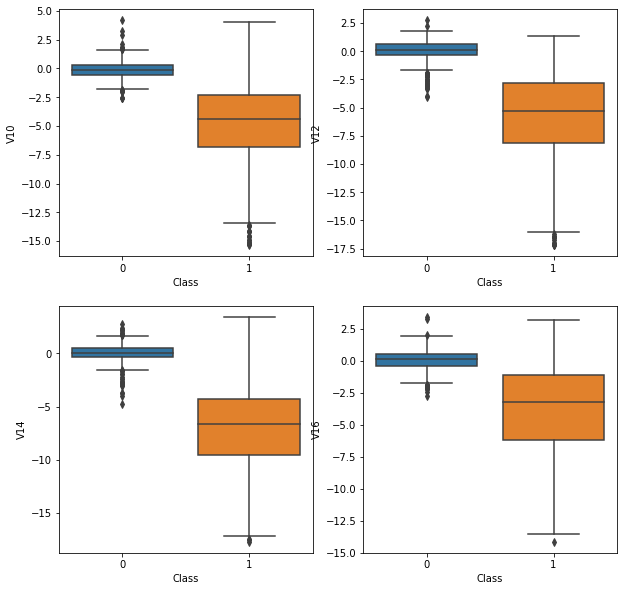

In [92]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(x=new_df['Class'],y=df['V10'],ax=ax[0,0])
sns.boxplot(x=new_df['Class'],y=df['V12'],ax=ax[0,1])
sns.boxplot(x=new_df['Class'],y=df['V14'],ax=ax[1,0])
sns.boxplot(x=new_df['Class'],y=df['V16'],ax=ax[1,1])

In [93]:

x=new_df.drop('Class',axis=1)
y=new_df['Class']
t0=time.time()
tsne=TSNE(n_components=2,random_state=42).fit_transform(x.values)
t1=time.time()

AttributeError: 'numpy.ndarray' object has no attribute 'time'

In [94]:
print("Time taken by tsne {:.2} s".format(t1-t0))

NameError: name 't1' is not defined

In [ ]:
t0=time.time()
pca=PCA(n_components=2,random_state=42).fit_transform(x.values)
t1=time.time()
print("Time taken by pca {:.2} s".format(t1-t0))

In [ ]:
t0=time.time()
pca=TruncatedSVD(n_components=2,random_state=42,algorithm="randomized").fit_transform(x.values)
t1=time.time()
print("Time taken by pca {:.2} s".format(t1-t0))

In [ ]:

blues=mpatches.Patch(color="red",label="No fraud")
reds=mpatches.Patch(color="red",label="fraud")
plt.scatter(tsne[:,0],tsne[:,1],c=(y==0),cmap="coolwarm",label="nofraud")
plt.scatter(tsne[:,0],tsne[:,1],c=(y==1),cmap="coolwarm",label="fraud")

In [ ]:
x=new_df.drop("Class",axis=1)
y=new_df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
Y_test=Y_test.values 

In [ ]:
classifiers={"LR":LogisticRegression(),
             "KN":KNeighborsClassifier(),
             "svc":SVC(),
             "DTC":DecisionTreeClassifier()
            }


In [ ]:
from sklearn.model_selection import cross_val_score
for key ,classifiers in classifiers.items():
    classifier.fit_transform(X_train,Y_train)
    score=cross_val_score(classifier,X_train,Y_train,cv=5)
       print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    